<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-marcoscvz/blob/main/Actividad_Semanal_7_regresiones_y_kmeans_A01688507.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Actividad de la semana 7 - Regresiones y K means**

###**Maestría en Inteligencia Artificial Aplicada**
###**Ciencia y Analítica de Datos**
###**Tecnológico de Monterrey**
###*Dra. María de la Paz Rico*

###**Nombre del estudiante:** *Marcos Chávez Chávez*

###**Matrícula:** *A01688507*

https://github.com/PosgradoMNA/actividades-de-aprendizaje-marcoscvz/blob/main/Actividad_Semanal_7_regresiones_y_kmeans_A01688507.ipynb

#Notebook 1. Regresión

##**Ejercicio 1. Costo en la industria de manufactura. Ahora realizaremos los ejercicios de regresión utilizando una parte para entrenar y otra para evaluar.**

In [174]:
#Leer archivo y convir a un data frame
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/EconomiesOfScale.csv')
df.describe()

,Number of Units,Manufacturing Cost
count,1000.000000,1000.000000
mean,4.472799,40.052999
std,1.336241,10.595322
min,1.000000,20.000000
25%,3.594214,32.912036
50%,4.435958,38.345781
75%,5.324780,44.531822
max,10.000000,100.000000


In [175]:
X = df[['Number of Units']]
y = df[['Manufacturing Cost']]

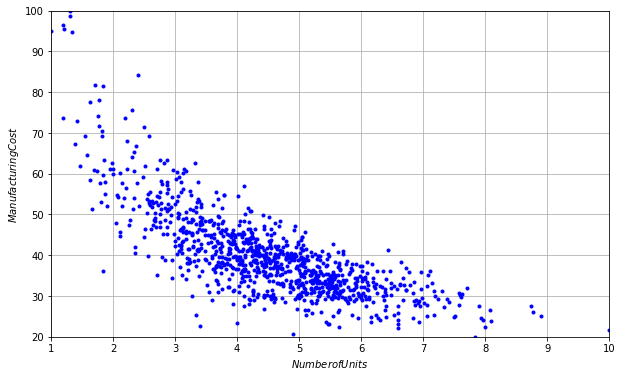

In [176]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(X, y, "b.")
plt.xlabel("$Number of Units$")
plt.ylabel("$Manufacturing Cost$", rotation=90)
plt.axis([1, 10, 20, 100])
plt.grid()
plt.show()


###*Divide los datos del costo de manufactura. Utiliza la función train_test_split*

In [177]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 0)

*Regresión Lineal.*
<br>
*Realiza la regresión lineal: modelo generado (ecuación), su visualización, sus errores y r cuadrada.*

In [178]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
print(lin_reg.coef_, lin_reg.intercept_)
print("train_r2_score = ", round(lin_reg.score(X_train, y_train), 4))

[[-6.07572379]] [67.23338773]
train_r2_score =  0.5838


Ecuación de la regresión
<br>
$\hat{y} = -6.0757x + 67.2334$


In [188]:
yhat = lin_reg.predict(X_test)

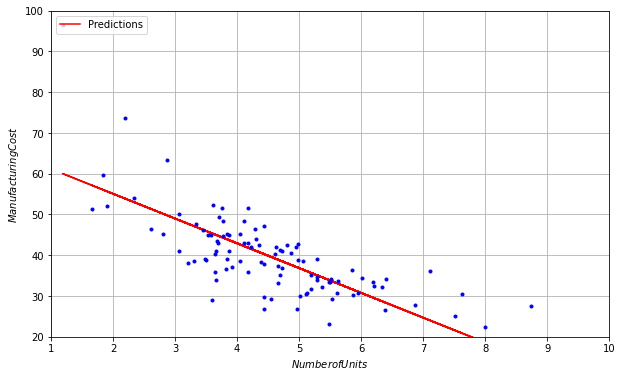

In [189]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # extra code – not needed, just formatting
plt.plot(X_test, yhat, "r-", label="Predictions")
plt.plot(X_test, y_test, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$Number of Units$")
plt.ylabel("$Manufacturing Cost$", rotation=90)
plt.axis([1, 10, 20, 100])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [190]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', round(metrics.mean_absolute_error(y_test, yhat), 4))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, yhat)), 4))
print('r2_score', round(r2_score(y_test, yhat), 4))

Error medio Absoluto (MAE): 4.9695
Root Mean Squared Error: 7.0361
r2_score 0.5315


*Regresión Polinomial.*
<br>
*Realiza la  regresión polinomial completa, tu modelo generado (ecuación), su visualización, sus errores y r cuadrada.*

In [191]:
#Crear cuadrado del regresor
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = pd.DataFrame(poly_features.fit_transform(X_train))

In [192]:
lin_reg_poly = LinearRegression(fit_intercept=True)
lin_reg_poly.fit(X_poly_train, y_train)
print(lin_reg_poly.coef_, lin_reg_poly.intercept_)
print("train_r2_score = ", round(lin_reg_poly.score(X_poly_train, y_train), 4))

[[-16.93616856   1.18609113]] [89.96279112]
train_r2_score =  0.6691



Ecuación de la regresión
<br>
$\hat{y} = 1.1861x^2 - 16.9362x + 89.9628$


In [193]:
X_poly_test = pd.DataFrame(poly_features.fit_transform(X_test))
yhat_poly = lin_reg_poly.predict(X_poly_test)

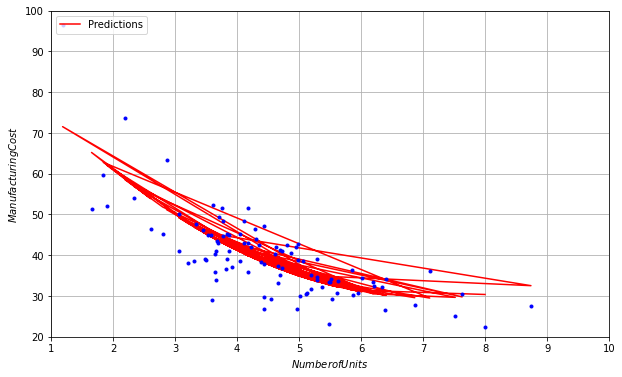

In [194]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # extra code – not needed, just formatting
plt.plot(X_test, yhat_poly, "r-", label="Predictions")
plt.plot(X_test, y_test, "b.")

plt.xlabel("$Number of Units$")
plt.ylabel("$Manufacturing Cost$", rotation=90)
plt.axis([1, 10, 20, 100])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [195]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', round(metrics.mean_absolute_error(y_test, yhat_poly), 4))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, yhat_poly)), 4))
print('r2_score', round(r2_score(y_test, yhat_poly), 4))

Error medio Absoluto (MAE): 4.8071
Root Mean Squared Error: 6.2891
r2_score 0.6257


*Realiza la regresión con Ridge y Lasso. Incluye la ecuación de tu modelo, visualización , errores y r cuadrada.*

In [214]:
#Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver="cholesky")
ridge_reg.fit(X_train, y_train)

Ridge(alpha=0.1, solver='cholesky')

In [215]:
print(ridge_reg.coef_, ridge_reg.intercept_)
print("train_r2_score = ", round(ridge_reg.score(X_train, y_train), 4))

[[-6.0753456]] [67.231698]
train_r2_score =  0.5838


Ecuación de la regresión
<br>
$\hat{y} = -6.0753x + 67.2313$

In [209]:
yhat_ridge = ridge_reg.predict(X_test)

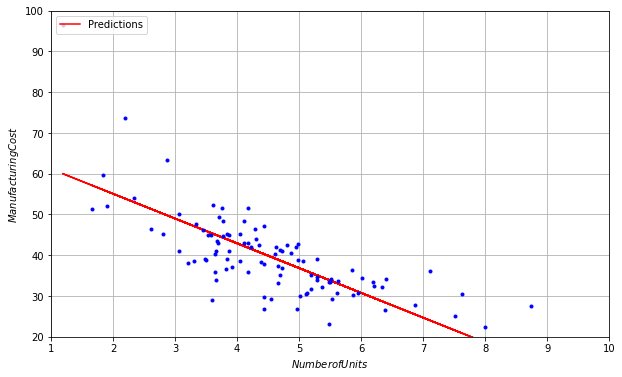

In [200]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # extra code – not needed, just formatting
plt.plot(X_test, yhat_ridge, "r-", label="Predictions")
plt.plot(X_test, y_test, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$Number of Units$")
plt.ylabel("$Manufacturing Cost$", rotation=90)
plt.axis([1, 10, 20, 100])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [210]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', round(metrics.mean_absolute_error(y_test, yhat_ridge), 4))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, yhat_ridge)), 4))
print('r2_score', round(r2_score(y_test, yhat_ridge), 4))

Error medio Absoluto (MAE): 4.9694
Root Mean Squared Error: 7.036
r2_score 0.5315


In [216]:
#Lasso Regression

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [217]:
print(lasso_reg.coef_, lasso_reg.intercept_)
print("train_r2_score = ", round(lasso_reg.score(X_train, y_train), 4))

[-6.01969927] [66.98307131]
train_r2_score =  0.5838


Ecuación de la regresión
<br>
$\hat{y} = -6.0197x + 66.9831$

In [218]:
yhat_lasso = lasso_reg.predict(X_test)

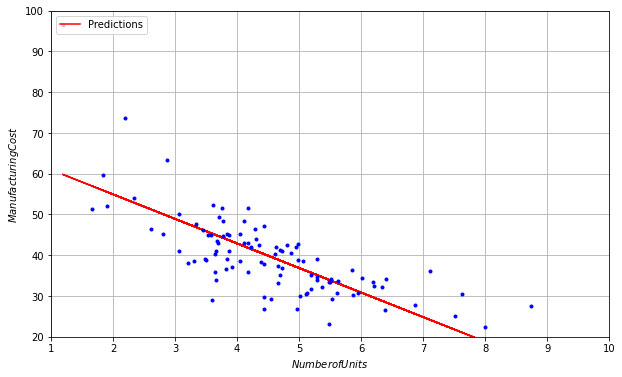

In [219]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))  # extra code – not needed, just formatting
plt.plot(X_test, yhat_lasso, "r-", label="Predictions")
plt.plot(X_test, y_test, "b.")

# extra code – beautifies and saves Figure 4–2
plt.xlabel("$Number of Units$")
plt.ylabel("$Manufacturing Cost$", rotation=90)
plt.axis([1, 10, 20, 100])
plt.grid()
plt.legend(loc="upper left")
plt.show()

In [220]:
import numpy as np
from sklearn import metrics
from sklearn.metrics import r2_score

print('Error medio Absoluto (MAE):', round(metrics.mean_absolute_error(y_test, yhat_lasso), 4))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, yhat_lasso)), 4))
print('r2_score', round(r2_score(y_test, yhat_lasso), 4))

Error medio Absoluto (MAE): 4.9576
Root Mean Squared Error: 7.0304
r2_score 0.5323


Finalmente grafica:
<br>
MAE (de los cuatro métodos)
<br>
R2 (de los cuatro métodos)

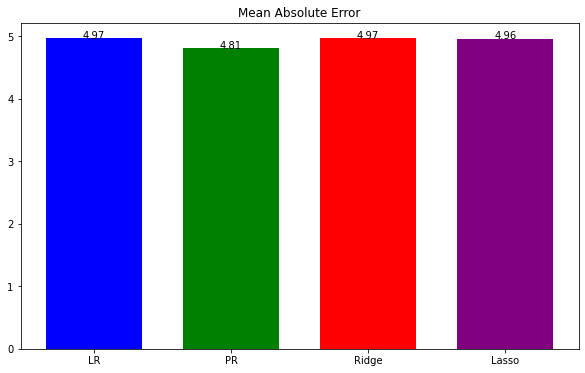

In [248]:
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# x-coordinates of left sides of bars 
plt.figure(figsize=(10, 6))
left = [0, 1, 2, 3]
height = [round(metrics.mean_absolute_error(y_test, yhat),2),
                round(metrics.mean_absolute_error(y_test, yhat_poly),2),
                      round(metrics.mean_absolute_error(y_test, yhat_ridge),2),
                            round(metrics.mean_absolute_error(y_test, yhat_lasso),2)]
tick_label = ['LR', 'PR', 'Ridge', 'Lasso']
plt.bar(left, height, tick_label = tick_label,
        width = 0.7, color = ['blue', 'green', 'red', 'purple'])
addlabels(left, height)
plt.title('Mean Absolute Error')
plt.show()

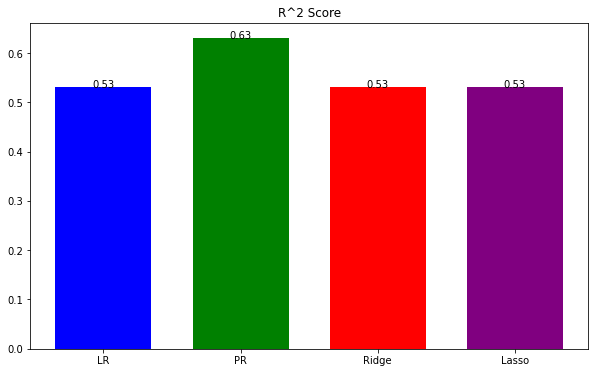

In [250]:
import matplotlib.pyplot as plt

def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

# x-coordinates of left sides of bars 
plt.figure(figsize=(10, 6))
left = [0, 1, 2, 3]
height = [round(r2_score(y_test, yhat), 2),
                round(r2_score(y_test, yhat_poly), 2),
                      round(r2_score(y_test, yhat_ridge), 2),
                            round(r2_score(y_test, yhat_lasso), 2)]
tick_label = ['LR', 'PR', 'Ridge', 'Lasso']
plt.bar(left, height, tick_label = tick_label,
        width = 0.7, color = ['blue', 'green', 'red', 'purple'])
addlabels(left, height)
plt.title('R^2 Score')
plt.show()

*Se observa un ajuste pobre utilizando sólo una variable para pronosticar en cualquiera de los modelos. En especial los métodos de Rige y Laso no resultan útiles ante subaste, por lo que en este caso su uso queda descartado. A pesar de observase una mejora mínima con modelo polinomio no se logra un buen pronóstico al revisar el MAE (sobreajuste). Sen este caso se sugiere quedarse con el modelo de regresión base o incorporar otras variables de interés al análisis para mejorar el ajuste y pronósticos.*

##**Ejercicio 2. Regresión múltiple.**

In [254]:
#Leer archivo y convir a un data frame
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/marypazrf/bdd/main/kc_house_data.csv')
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [260]:
X = df.drop(['price'] , axis = 1)
y = df[['price']]

###*Divide los datos. Utiliza la función train_test_split (ya esta en el notebook)*

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Notebook 2. K means

In [251]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 16.7 MB 523 kB/s 
     |████████████████████████████████| 1.0 MB 41.8 MB/s 
     |████████████████████████████████| 1.7 MB 42.8 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 179 kB 51.1 MB/s 
     |████████████████████████████████| 6.3 MB 12.6 MB/s 
  Created wheel for qeds: filename=qeds-0.7.0-py3-none-any.whl size=27812 sha256=04f12b9c9d219a4c9b5a6c93514055d6b35ffe4bcde27b884a15cb294a9a7afb
  Stored in directory: /root/.cache/pip/wheels/fc/8c/52/0cc036b9730b75850b9845770780f8d05ed08ff38a67cbaa29
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136897 sha256=48af38ae877c9b6be051120526c669420cd41a9e0354b9cae9b61d842b17938b
  Stored in directory: /root/.

In [252]:
import pandas as pd
import numpy as np
from tqdm import tqdm
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import geopandas

###Encuentra el numero ideal de almacenes, justifica tu respuesta:

In [253]:
url="https://raw.githubusercontent.com/marypazrf/bdd/main/target-locations.csv"
df=pd.read_csv(url)